In [64]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import opt_tugba
import sys
import os

In [65]:
new_event = True 
time = 4.25
pow_max = 10
pow_min = 0
overstay_duration= 1
duration= 12
batt_cap= 80

SOC_init = 0.3
SOC_need= 0.8
event = event = {"time" : time, "pow_min" : pow_min, "pow_max" : pow_max, "overstay_duration" : overstay_duration, "duration" : duration, "batt_cap" : batt_cap, "SOC_need" : SOC_need, "SOC_init" : SOC_init, 'eff':1.0, "lam_x" : 0}

tariff = np.ones((96,)) 
tariff[40:60] = np.ones(shape = (20,)) * 5
z = [50, 50, 10, 1]
v = [0.45,0.45,0.1]
tariff

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [66]:
par = opt_tugba.Parameters(TOU = tariff)
prb = opt_tugba.Problem(par = par, event = event)
opt = opt_tugba.Optimization(par, prb)
res = opt.run_opt()


48 17 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 1. 1. 1. 1. 1.]
u: [3.71 3.71 3.71 3.71 3.71 3.71 3.71 3.71 3.71 3.71 3.71 3.71 3.71 3.71
 3.71 3.71 3.71 3.71 3.71 3.71 3.71 3.71 3.71 3.51 3.51 3.51 3.51 3.51
 3.51 3.51 3.51 3.51 3.51 3.51 3.51 3.51 3.51 3.51 3.51 3.51 3.51 3.51
 3.51 3.71 3.71 3.71 3.71 3.71] SOC: [0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.39 0.4  0.41 0.42 0.43 0.44
 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.55 0.56 0.57 0.58 0.59
 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73
 0.74 0.75 0.76 0.77 0.78 0.79 0.8 ]


/Users/aysetugbaozturk/miniconda3/lib/python3.8/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/Users/aysetugbaozturk/miniconda3/lib/python3.8/site-packages/cvxpy/reductions/solvers/solving_chain.py:325: DeprecationWarning: Deprecated, use Model.addMConstr() instead
  return self.solver.solve_via_data(data, warm_start, verbose,


In [67]:
days = 0 
num_interval= len(par.TOU)
interval_size = par.Ts

timerange = pd.date_range("1/1/2021", periods=num_interval, freq="{}H".format(interval_size ))
TOU_cost = pd.Series(par.TOU, index = timerange, name = "TOU Cost ($)")


# Event parameters: arrival_time, soc_init, soc_need, departure
opt_time_start  = pd.Timestamp(year=2021, month=1, day=1, hour = int(res["time_start"] // 1), minute = int(60 * ( res['time_start'] % 1)))
opt_time_end_flex  =pd.Timestamp(year=2021, month=1, day=1, hour = int(res["time_end_flex"]  // 1),  minute = int(60 *(res['time_end_flex'] % 1)))
opt_time_end_asap  = pd.Timestamp(year=2021, month=1, day=1, hour = int(res["time_end_asap"] // 1), minute = int(60 *(res['time_end_asap'] % 1)))

flex_ts = pd.date_range(start=opt_time_start , end=opt_time_end_flex, freq="{}H".format(par.Ts))
asap_ts = pd.date_range(start=opt_time_start , end=opt_time_end_asap, freq="{}H".format(par.Ts))

# Optimization outputs 

## Question: Why flex output length mismatches the timelength? 
# print(opt.opt_flex_powers.shape)
opt_flex_powers = pd.Series(res['flex_powers'].reshape(len(res['flex_powers']),), index = flex_ts[:-1], name = "Flew Power (kWh)")
opt_asap_powers = pd.Series(res['asap_powers'].reshape(len(res['asap_powers']),), index = asap_ts[:-1], name = "ASAP Power (kWh)")
opt_flex_SOCs = pd.Series(res['flex_SOCs'].reshape(len(res['flex_SOCs']),), index = flex_ts, name = "Flex SOC (%)")
# event = prb.event
# print(event)




        

/Users/aysetugbaozturk/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
## PLOT FOR 2 days 
days =2 
ts = pd.date_range(timerange[0], periods=num_interval * days, freq="{}H".format(interval_size ))
df_plot = pd.DataFrame(index = ts, 
                        data = {"TOU Cost ($)": list(TOU_cost.values) * days, 
                        "Flex Power (kW)": opt_flex_powers, 
                        "ASAP Power (kW)":opt_asap_powers, 
                        "Flex SOC (%)":opt_flex_SOCs})

df_plot["Flex SOC (%)"] = df_plot["Flex SOC (%)"].fillna(method='bfill').fillna(method='ffill')
df_plot = df_plot.fillna(0)
df_plot['Station Max Power (kW)'] = event['pow_max']
df_plot['Station Min Power (kW)'] = event['pow_min']
df_plot['Arrival SOC'] = event['SOC_init']
df_plot['Departure SOC Demand'] = event['SOC_init'] + event['SOC_need']



def plot_arrival_departure(ax_list, event):
    for ax in ax_list:
        arrival_time = pd.Timestamp(year=2021, month=1, day=1, hour = int(event['time']// 1), minute = int(60 * ( event['time'] % 1)))
        departure_time = arrival_time + pd.Timedelta(hours = int(event['duration']// 1), minutes = int(60 * ( event['time'] % 1)))
        ax.axvspan(arrival_time, departure_time, facecolor='b', alpha=0.1)

def plot_max_min_power(ax_list, df_plot):
    for ax in ax_list:
        ax.plot(df_plot['Station Max Power (kW)'], label="Station Max Power (kW", color = 'red')
        # ax.plot(df_plot['Station Min Power (kW)'],label="Station Max Power (kW")))


In [69]:
res['flex_powers']

array([3.70652174, 3.70652174, 3.70652174, 3.70652174, 3.70652174,
       3.70652174, 3.70652174, 3.70652174, 3.70652174, 3.70652174,
       3.70652174, 3.70652174, 3.70652174, 3.70652174, 3.70652174,
       3.70652174, 3.70652174, 3.70652174, 3.70652174, 3.70652174,
       3.70652174, 3.70652174, 3.70652174, 3.50652174, 3.50652174,
       3.50652174, 3.50652174, 3.50652174, 3.50652174, 3.50652174,
       3.50652174, 3.50652174, 3.50652174, 3.50652174, 3.50652174,
       3.50652174, 3.50652174, 3.50652174, 3.50652174, 3.50652174,
       3.50652174, 3.50652174, 3.50652174, 3.70652174, 3.70652174,
       3.70652174, 3.70652174, 3.70652174])

<>:37: DeprecationWarning: invalid escape sequence \l
<>:37: DeprecationWarning: invalid escape sequence \l
<ipython-input-70-23d4c2e030e1>:37: DeprecationWarning: invalid escape sequence \l
  fig.suptitle("J = u.T @ TOU + |u|_2 * $\lambda$ (lam = 0)")


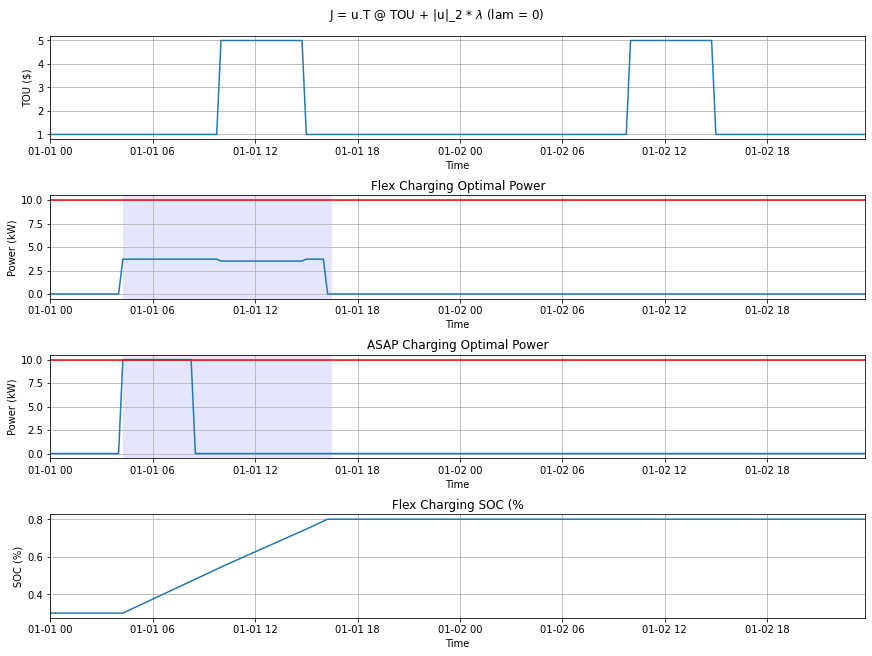

In [70]:
plt.rcParams['figure.constrained_layout.use'] = True

fig,(ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(12,9) ,)

x_lim  = (list(df_plot.index)[0],list(df_plot.index)[-1])
ax1.plot(df_plot['TOU Cost ($)'])
ax1.set_xlim(x_lim)
ax1.grid()
ax1.set_xlabel("Time")
ax1.set_ylabel("TOU ($)")


ax2.plot(df_plot["Flex Power (kW)"])
ax2.set_xlim(x_lim)
ax2.grid()
ax2.set_xlabel("Time")
ax2.set_ylabel("Power (kW)")
ax2.set_title("Flex Charging Optimal Power")

ax3.plot(df_plot["ASAP Power (kW)"])
ax3.set_xlim(ax1.set_xlim(x_lim))
ax3.grid()
ax3.set_xlabel("Time")
ax3.set_ylabel("Power (kW)")
ax3.set_title("ASAP Charging Optimal Power")

ax4.plot(df_plot["Flex SOC (%)"])
ax4.set_xlim(x_lim)
ax4.grid()
ax4.set_xlabel("Time")
ax4.set_ylabel("SOC (%)")
ax4.set_title("Flex Charging SOC (%")

plot_arrival_departure([ax2,ax3], event)
plot_max_min_power([ax2,ax3], df_plot)

fig.suptitle("J = u.T @ TOU")
plt.savefig(os.path.join("Figures/", "test_full_code_5.png"))